In [40]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# plot waypoints
def plot_waypoints(waypoints):
    # ----------- plot figure --------------- 
    plt.figure(figsize=(8, 8))
    for i in range(len(waypoints) - 1):
        point1 = [waypoints[i][0], waypoints[i+1][0]]
        point2 = [waypoints[i][1], waypoints[i+1][1]]
        plt.plot(point1, point2, '-o', lw=2.0, color='blue')

#     for i in range(100):
#         x_o = np.linspace(0, 34, 100)
#         y_o = i*wv - (wv/wh)*x_o
#         plt.plot(x_o, y_o, '--', color='black', alpha=0.25)
    
        
#     plt.hlines(0, 0, L, lw = 3.0, color='red')
#     plt.vlines(0, 0, W, lw = 3.0, color='red')
#     plt.hlines(L, 0, L, lw = 3.0, color='red')
#     plt.vlines(W, 0, W, lw = 3.0, color='red')

    x = [i for i in range(35)]
    plt.xticks(x, x)
    x = [i for i in range(35)]
    plt.yticks(x, x)
    
    plt.xlim([-1, L+1])
    plt.ylim([-1, W+1])
    
    plt.show()
    

def gen_waypoints_1(waypoints, i, wh, wv, L, W):

    h_val = ((i * wv) - W) / np.tan(theta_rad)
    v_val = ((i * wh) - L) * np.tan(theta_rad)
    if i % 2 != 0:
        waypoints.append([min(i * wh, L), 0])
        if wv > W and wh <= L:
            waypoints.append([h_val, min(i * wv, W)])
        elif wv <= W and wh > L: 
            waypoints.append([L, v_val])
    else:
        waypoints.append([0, min(i * wv, W)])
        waypoints.append([min(i * wh, L), 0])

        
def gen_waypoints_2(waypoints, i, wh, wv, L, W, idx_h, ph):
    if i % 2 == 0:
        waypoints.append([ph + idx_h * wh, W])
        waypoints.append([i * wh, 0])
    else:
        waypoints.append([i * wh, 0])
        waypoints.append([ph + idx_h * wh, W])


def gen_waypoints_3(waypoints, i, wh, wv, L, W, idx_h, idx_v, ph, pv):
    if i % 2 == 0:
        waypoints.append([ph + idx_h * wh, i * wv])
        waypoints.append([L, pv + idx_v * wv])
    else:
        waypoints.append([L, pv + idx_v * wv])
        waypoints.append([ph + idx_h * wh, i * wv])


def gen_waypoints_4(waypoints, i, wh, wv, L, W, idx_h, idx_v, ph, pv):
    if i % 2 == 0:
        waypoints.append([ph + idx_h * wh, W])
        waypoints.append([L, pv + idx_v * wv])
    else:
        waypoints.append([L, pv + idx_v * wv])
        waypoints.append([ph + idx_h * wh, L])


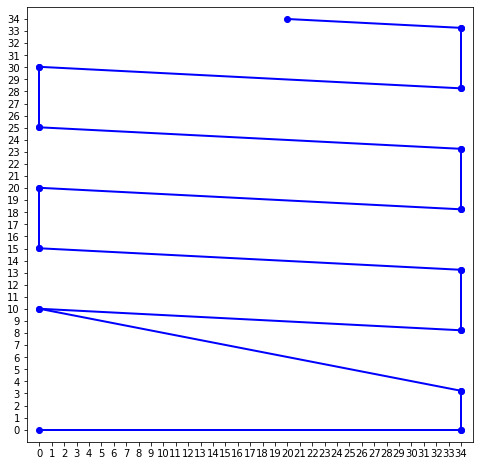

In [41]:
# -------------------------------------
# input variables        
lxy = 5.0  # PnC unit cell spacing (mm) 
theta = 3
# PnC filament orintation (degrees)
L = 34.0  # PnC length (mm)
W = 34.0   # PnC width (mm)

# calculate distance between first two waypoints
theta_rad = theta * np.pi / 180
wh = lxy / np.sin(theta_rad)
wv = lxy / np.cos(theta_rad)
# ---------------------------------
waypoints = [[0.0, 0.0]]
idx_h, idx_v = 0, 0
horiz, vert = True, True
horiz_new, vert_new = True, True
ph, pv = 0, 0
i = 1
#     while horiz_new and vert_new:

for t in range(20):    
    if horiz and vert:
        gen_waypoints_1(waypoints, i, wh, wv, L, W)
        ph = max(((i + 1) * wv - W) / np.tan(theta_rad), 0)
        pv = max(((i + 1) * wh - L) * np.tan(theta_rad), 0)
        horiz = (i + 1) * wh <= L
        vert = (i + 1) * wv <= W
    
    elif not vert and horiz:
        if horiz_new and horiz:
            gen_waypoints_2(waypoints, i, wh, wv, L, W, idx_h, ph)
            idx_h += 1
            pv = ((i + 1) * wh4 - L) * np.tan(theta_rad)
            horiz_new = ph + idx_h * wh <= L
            horiz = (i + 1) * wh <= L
            vert_new = pv + idx_v * wv <= L

    elif not horiz and vert:
        if vert_new and vert:
            gen_waypoints_3(waypoints, i, wh, wv, L, W, idx_h, idx_v, ph, pv)
            idx_v += 1
            vert = (i + 1) * wv <= W
            vert_new = pv + idx_v * wv <= W
            horiz_new = ph + idx_h * wh <= L
            ph = max(((i + 1) * wv - W) / np.tan(theta_rad), 0)

    elif not horiz and not vert:
        if horiz_new and vert_new:
            gen_waypoints_4(waypoints, i, wh, wv, L, W, idx_h, idx_v, ph, pv)
            idx_v += 1
            idx_h += 1
            horiz_new = ph + idx_h * wh <= L
            vert_new = pv + idx_v * wv <= L
    i += 1
    
plot_waypoints(waypoints)

In [19]:
vert

True